# Evaluación - Aprendizaje NO supervisado

**Integrante 1: Marco Cerda Chamorro

**Integrante 2: Joaquin Maureira Veliz

**Correo Electrónico integrante 1: marco.cerda2101@alumnos.ubiobio.cl


**Correo Electrónico integrante 2: joaquin.maureira2101@alumnos.ubiobio.cl


---

## Descripción

Este notebook contiene la evaluación asociada al tópico de aprendizaje NO supervisado de la asignatura de Inteligencia Artificial de la carrera de Ingeniería Civil en informática de la UBB.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)
- kneed-0.8.5

# Descripción de los datos

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

In [ ]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/affairs.csv

--2024-11-15 02:48:52--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/affairs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286041 (279K) [text/plain]
Saving to: ‘affairs.csv’

affairs.csv         100%[===================>] 279.34K  --.-KB/s    in 0.008s  

2024-11-15 02:48:52 (34.8 MB/s) - ‘affairs.csv’ saved [286041/286041]



In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn kneed wget

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.base import TransformerMixin

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carga de datos

In [ ]:
data = pd.read_csv("affairs.csv")
data.shape

(6366, 10)

In [ ]:
data.head(7)

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174


# Análisis preliminar de los datos

## Revision de tipos de variables

In [ ]:
data.dtypes

,0
Unnamed: 0,int64
rate_marriage,float64
age,float64
yrs_married,float64
children,float64
religious,float64
educ,float64
occupation,float64
occupation_husb,float64
affairs,float64


---


$\textbf{COMENTARIO}$


---
Se aprecia la existencia de 10 variables cuantitativas

## Registros que incumplen las reglas del negocio

In [ ]:
# Obtiene registros que incumplen con reglas naturales del negocio
data.query('age - yrs_married < 18')

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
6,6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
14,14,4.0,22.0,6.0,1.0,1.0,14.0,4.0,4.0,3.266665
17,17,1.0,37.0,23.0,5.5,4.0,14.0,5.0,2.0,1.826086
...,...,...,...,...,...,...,...,...,...,...
6309,6309,5.0,37.0,23.0,2.0,3.0,20.0,4.0,4.0,0.000000
6315,6315,3.0,17.5,2.5,1.0,1.0,9.0,3.0,3.0,0.000000
6340,6340,5.0,27.0,13.0,3.0,3.0,16.0,4.0,2.0,0.000000
6343,6343,5.0,17.5,2.5,0.0,4.0,12.0,3.0,5.0,0.000000


In [ ]:
# Elimino registros que incumplen reglas naturales del negocio
#data.drop(data.query('age - yrs_married < 18').index, inplace=True)

## Revision de valores nulos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6366 non-null   int64  
 1   rate_marriage    6366 non-null   float64
 2   age              6366 non-null   float64
 3   yrs_married      6366 non-null   float64
 4   children         6366 non-null   float64
 5   religious        6366 non-null   float64
 6   educ             6366 non-null   float64
 7   occupation       6366 non-null   float64
 8   occupation_husb  6366 non-null   float64
 9   affairs          6366 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


## Analisis de variables

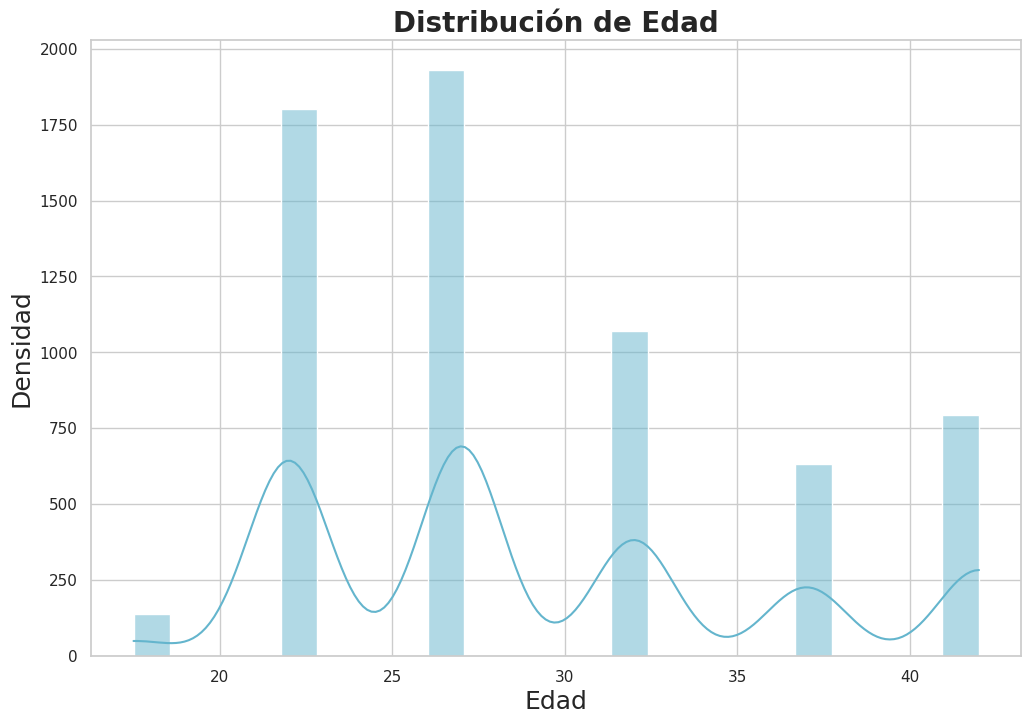

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data['age'], kde = True, color = 'c')
plt.title('Distribución de Edad', fontsize = 20, fontweight="bold")
plt.xlabel("Edad", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [ ]:
pd.DataFrame(data.age.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.0,42.0


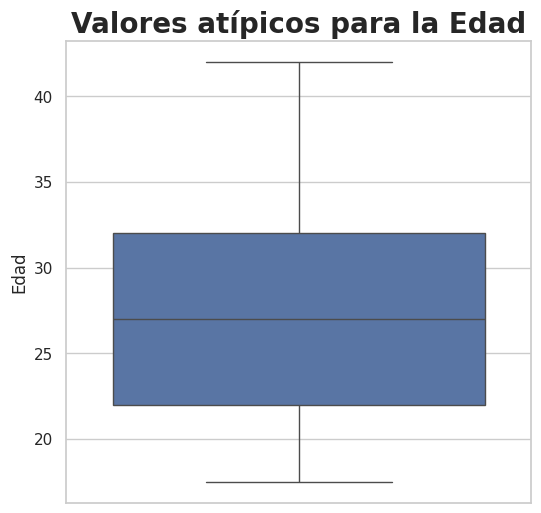

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la Edad", fontsize=20, fontweight="bold")
plt.ylabel("Edad")
sns.boxplot(y='age',data=data);

### Comentarios acerca de la edad

+ Paciente con mayor edad tiene xx años.
+ El 50% de los pacientes tiene xx años o menos
+ El paciente joven tiene xx años
+ El promedio de edad de los pacientes es de xx años aproximadamente.
+ Inexistencia de valores atípicos (outliers)

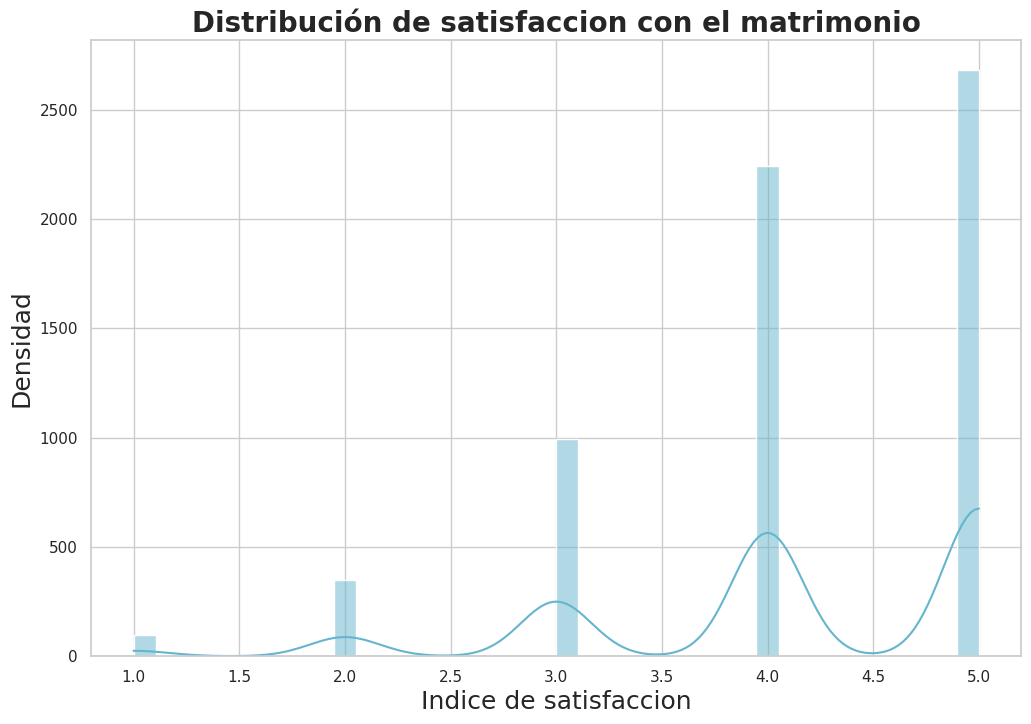

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data['rate_marriage'], kde = True, color = 'c')
plt.title('Distribución de satisfaccion con el matrimonio', fontsize = 20, fontweight="bold")
plt.xlabel("Indice de satisfaccion", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [ ]:
pd.DataFrame(data.rate_marriage.describe()).T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.96143,1.0,4.0,4.0,5.0,5.0


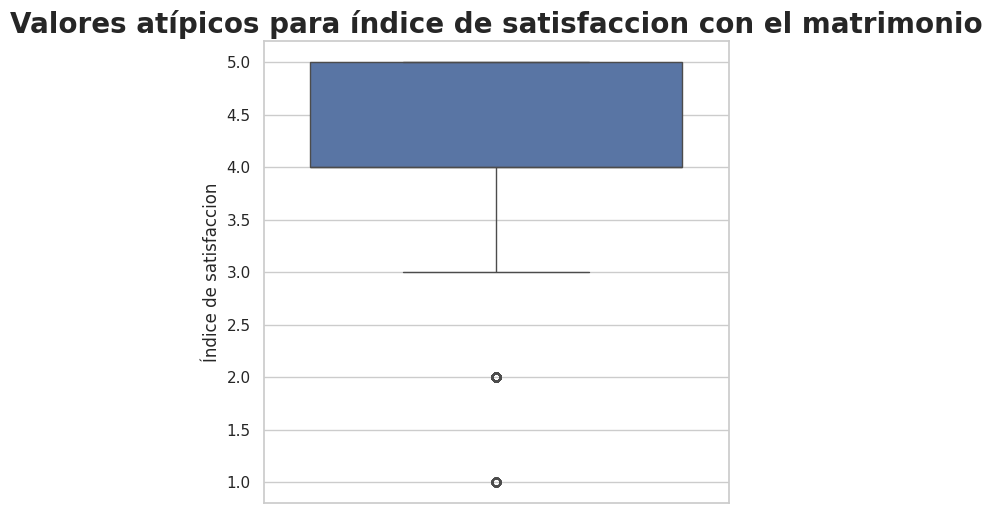

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para índice de satisfaccion con el matrimonio", fontsize=20, fontweight="bold")
sns.boxplot(y='rate_marriage',data=data)
plt.ylabel("Índice de satisfaccion")
plt.show()

In [ ]:
# Identifica los valores atipicos
Q1 = np.quantile(data['rate_marriage'], 0.25)
Q3 = np.quantile(data['rate_marriage'], 0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
valores_atipicos = data[(data['rate_marriage'] < limite_inferior) | (data['rate_marriage'] > limite_superior)]

# Muestra los valores atípicos
valores_atipicos


,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
10,10,2.0,27.0,6.0,2.0,1.0,16.0,3.0,5.0,3.266665
17,17,1.0,37.0,23.0,5.5,4.0,14.0,5.0,2.0,1.826086
18,18,2.0,42.0,23.0,2.0,2.0,20.0,4.0,4.0,1.826086
23,23,2.0,27.0,9.0,2.0,4.0,20.0,3.0,4.0,0.622222
26,26,2.0,27.0,6.0,2.0,2.0,12.0,2.0,5.0,0.166667
...,...,...,...,...,...,...,...,...,...,...
6200,6200,2.0,37.0,16.5,3.0,3.0,12.0,3.0,4.0,0.000000
6308,6308,2.0,37.0,16.5,3.0,1.0,14.0,3.0,2.0,0.000000
6310,6310,2.0,32.0,9.0,2.0,4.0,14.0,3.0,5.0,0.000000
6317,6317,1.0,27.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


### Comentarios acerca de indice de satisfaccion con su matrimonio

+ Paciente con mayor edad tiene xx años.
+ El 50% de los pacientes tiene xx años o menos
+ El paciente joven tiene xx años
+ El promedio de edad de los pacientes es de xx años aproximadamente.
+ Existencia de valores atípicos (outliers)

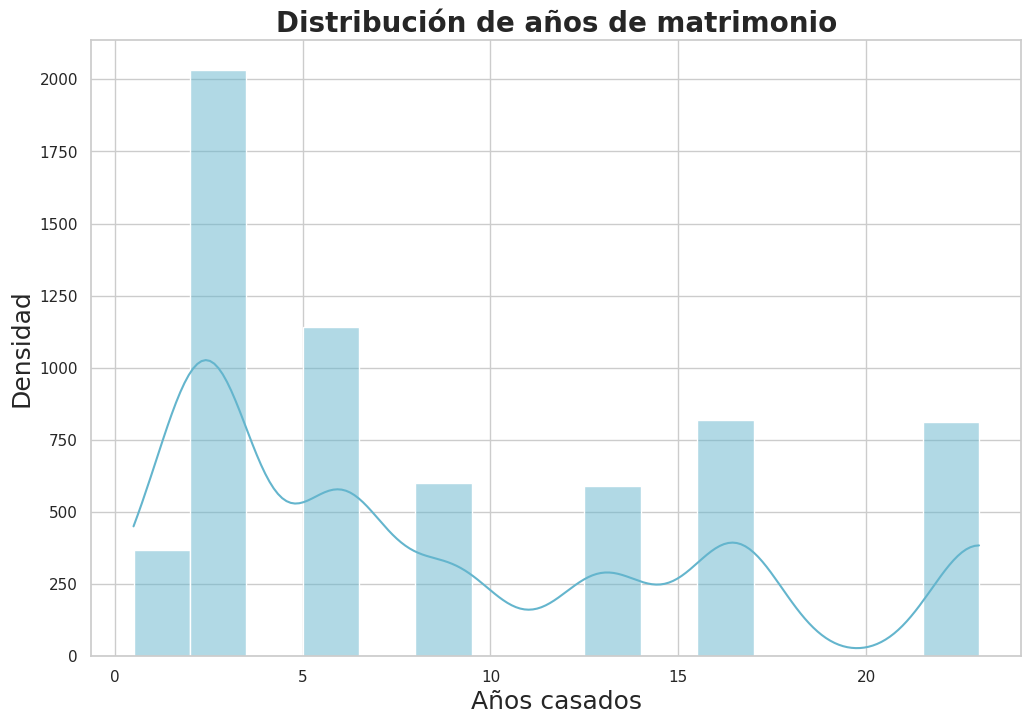

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data['yrs_married'], kde = True, color = 'c')
plt.title('Distribución de años de matrimonio', fontsize = 20, fontweight="bold")
plt.xlabel("Años casados", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [ ]:
pd.DataFrame(data.yrs_married.describe()).T

,count,mean,std,min,25%,50%,75%,max
yrs_married,6366.0,9.009425,7.28012,0.5,2.5,6.0,16.5,23.0


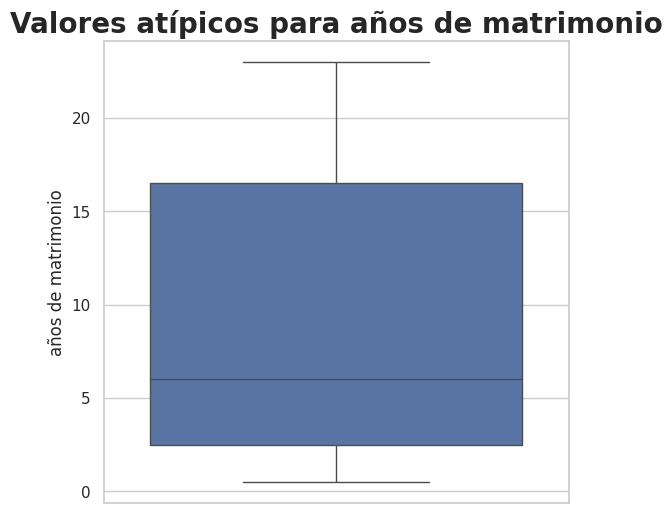

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para años de matrimonio", fontsize=20, fontweight="bold")
sns.boxplot(y='yrs_married',data=data)
plt.ylabel("años de matrimonio")
plt.show()

### Comentarios acerca de cantidad de años casados.

+ Paciente con mayor edad tiene xx años.
+ El 50% de los pacientes tiene xx años o menos
+ El paciente joven tiene xx años
+ El promedio de edad de los pacientes es de xx años aproximadamente.
+ Inexistencia de valores atípicos (outliers)

# Calculo de clusters

## Usando Inercias

#### Tecnica 1

##### Valor defecto de init

##### Valor asignado a init

#### Tecnica 2

##### Valor defecto de init

##### Valor asignado a init

## Usando Indice de Silhouette

#### Tecnica 1

##### Valor defecto de init

##### Valor asignado a init

#### Tecnica 2

##### Valor defecto de init

##### Valor asignado a init

# Modelos de segmentación

# Tabla de resultados

# Análisis de los grupos

In [ ]:
# Escriba su código acá

# Comentarios finales